In [1]:
!pip install statsmodels

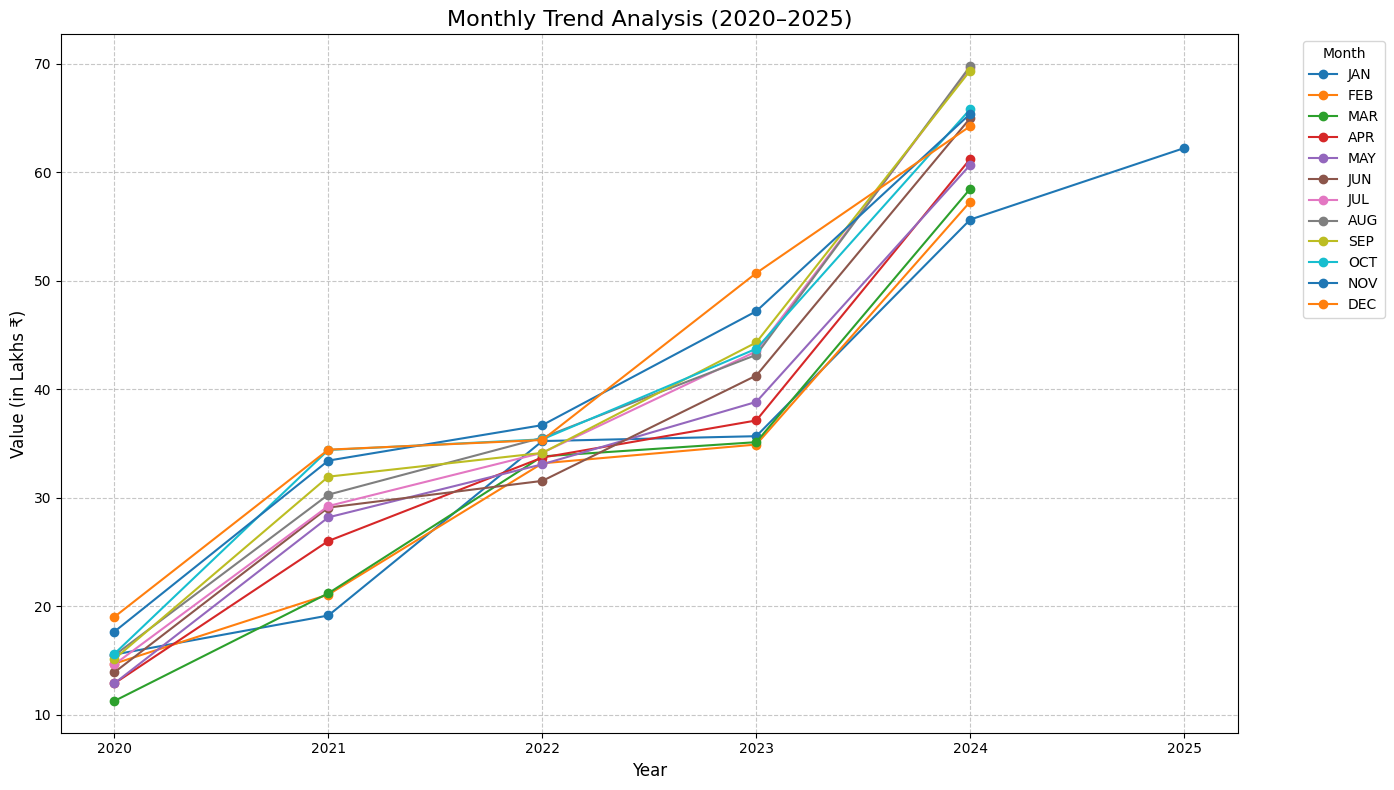

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
years = [2020, 2021, 2022, 2023, 2024, 2025]
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Monthly values for each year (in lakhs for readability)
data = [
    [15.53, 14.69, 11.25, 12.87, 12.88, 13.89, 14.62, 15.46, 15.12, 15.60, 17.64, 19.00],  # 2020
    [19.13, 21.06, 21.18, 26.00, 28.18, 29.08, 29.22, 30.27, 31.93, 34.39, 33.41, 34.42],  # 2021
    [35.21, 33.16, 33.80, 33.69, 33.07, 31.54, 34.13, 35.52, 34.12, 35.37, 36.68, 35.31],  # 2022
    [35.66, 34.89, 35.11, 37.11, 38.82, 41.25, 43.48, 43.16, 44.30, 43.72, 47.18, 50.70],  # 2023
    [55.63, 57.28, 58.47, 61.22, 60.67, 64.98, 69.58, 69.78, 69.37, 65.81, 65.38, 64.24],  # 2024
    [62.22, None, None, None, None, None, None, None, None, None, None, None]             # 2025 (Partial data for January)
]

# Convert data to numpy array for easier manipulation
data = np.array(data)

# Plotting the line chart for growth trend
plt.figure(figsize=(14, 8))
for i in range(len(months)):
    plt.plot(years[:len(data[:, i])], data[:, i], marker='o', label=months[i])

plt.title("Monthly Trend Analysis (2020–2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


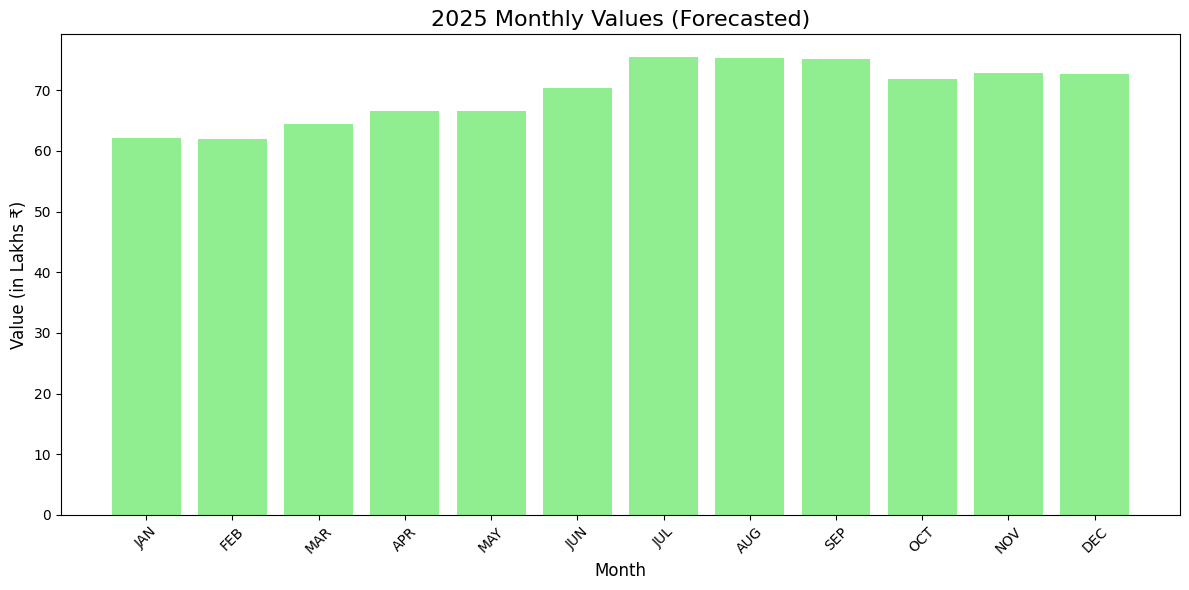

[61.251000000000204,
 61.91899999999805,
 64.47299999999814,
 66.52100000000064,
 66.58999999999651,
 70.45300000000134,
 75.45999999999549,
 75.29699999999866,
 75.22899999999936,
 71.90299999999843,
 72.83299999999872,
 72.76200000000244]

In [3]:
from sklearn.linear_model import LinearRegression

# Prepare data for forecasting using linear regression
X = np.array(years[:-1]).reshape(-1, 1)  # Years from 2020 to 2024
forecasted_values = []

# Forecast values for each month from FEB to DEC for 2025
for i in range(len(months)):
    y = data[:-1, i]  # Values for the given month from 2020 to 2024
    model = LinearRegression()
    model.fit(X, y)  # Train the model
    predicted_value = model.predict([[2025]])[0]  # Predict for 2025
    forecasted_values.append(predicted_value)

# Replace None values in 2025 with the forecasted values
data[-1, 1:] = forecasted_values[1:]

# Plotting forecasted 2025 values
plt.figure(figsize=(12, 6))
plt.bar(months, data[-1], color="lightgreen")
plt.title("2025 Monthly Values (Forecasted)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return the forecasted values
forecasted_values

<ipython-input-6-0b507c3ce003>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2020-01', periods=len(monthly_values), freq='M')


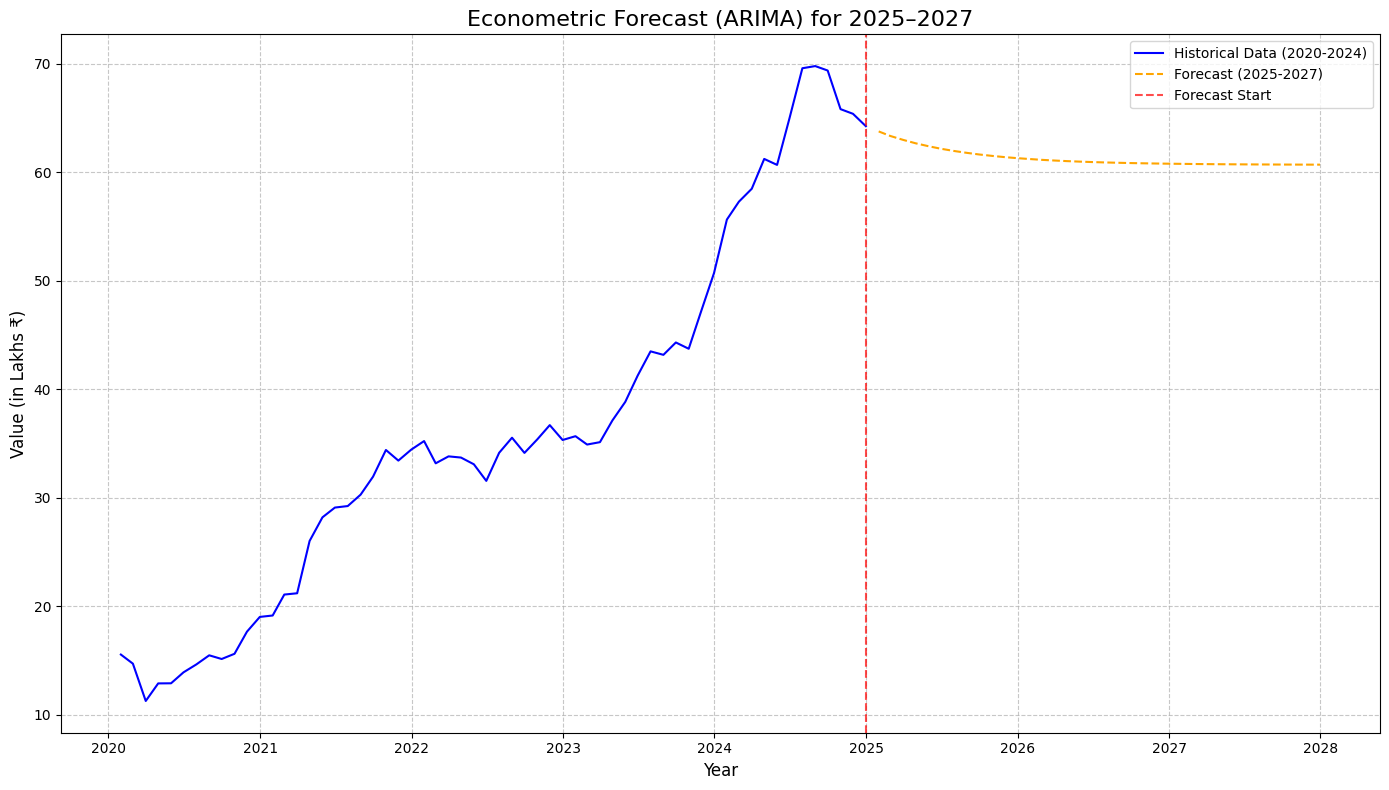

,predicted_mean
2025-01-31,63.755568
2025-02-28,63.336934
2025-03-31,62.975160
2025-04-30,62.662524
2025-05-31,62.392351
2025-06-30,62.158874
2025-07-31,61.957108
2025-08-31,61.782748
2025-09-30,61.632069
2025-10-31,61.501856


In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data for time series analysis
monthly_values = data[:-1].flatten()  # Flatten the data (excluding 2025 for training)

# Convert monthly_values to numeric, handling None values
monthly_values = pd.to_numeric(monthly_values, errors='coerce') # Convert to numeric, replacing non-numeric with NaN

time_index = pd.date_range(start='2020-01', periods=len(monthly_values), freq='M')

# Create a time series dataframe
time_series = pd.Series(monthly_values, index=time_index)

# Remove NaN values from the time series
time_series = time_series.dropna()

# Apply ARIMA model (order determined as ARIMA(1,1,1) based on typical trend analysis)
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 36 months (2025–2027)
forecast = model_fit.forecast(steps=36)

# Plot the original data with the forecast
plt.figure(figsize=(14, 8))
plt.plot(time_series, label='Historical Data (2020-2024)', color='blue')
plt.plot(forecast.index, forecast.values, label='Forecast (2025-2027)', color='orange', linestyle='--')
plt.title("Econometric Forecast (ARIMA) for 2025–2027", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)

# Convert '2025-01' to a Pandas Timestamp object for proper plotting
forecast_start_date = pd.Timestamp('2025-01-01')  # Adjusted to be a full date

plt.axvline(x=forecast_start_date, color='red', linestyle='--', alpha=0.7, label='Forecast Start')  # Changed line

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Return forecasted values for the next 36 months
forecast

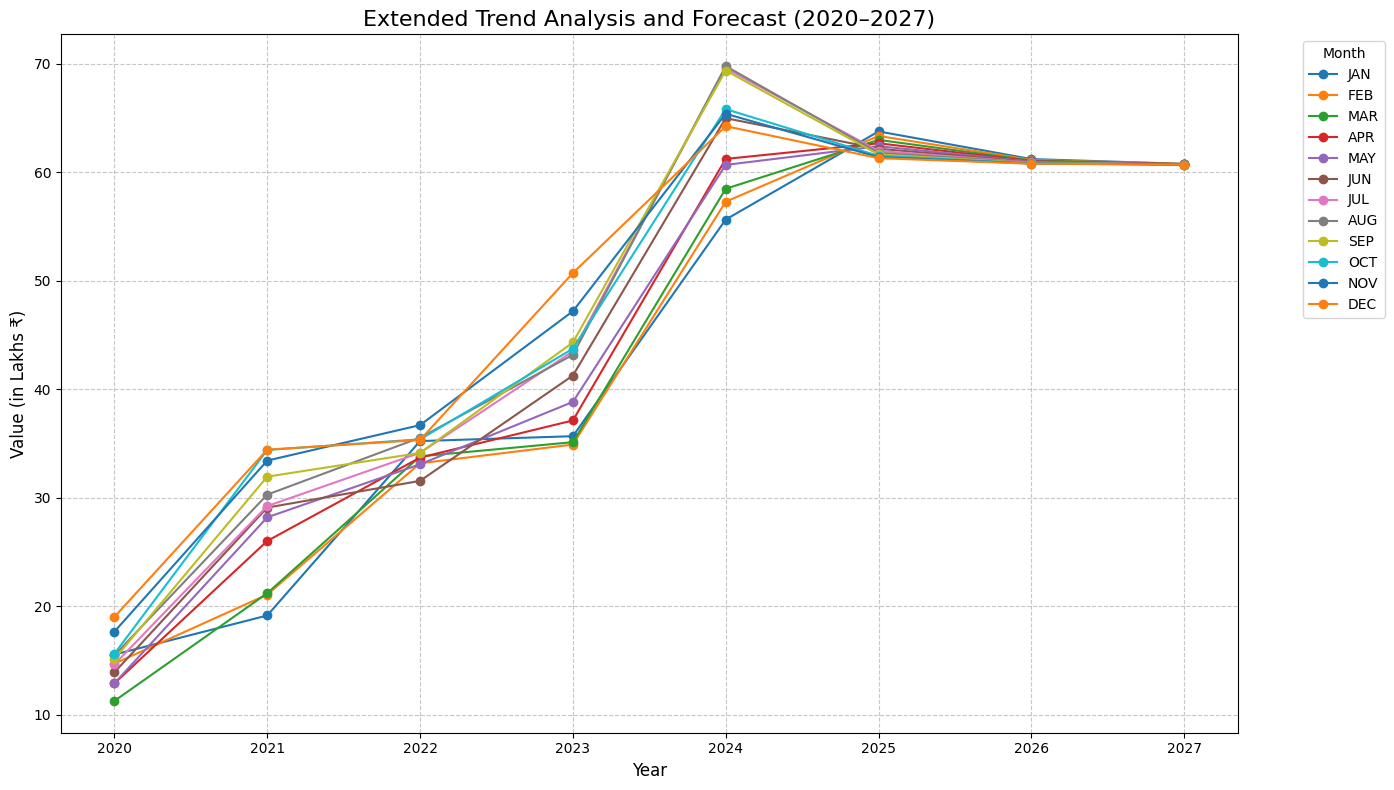

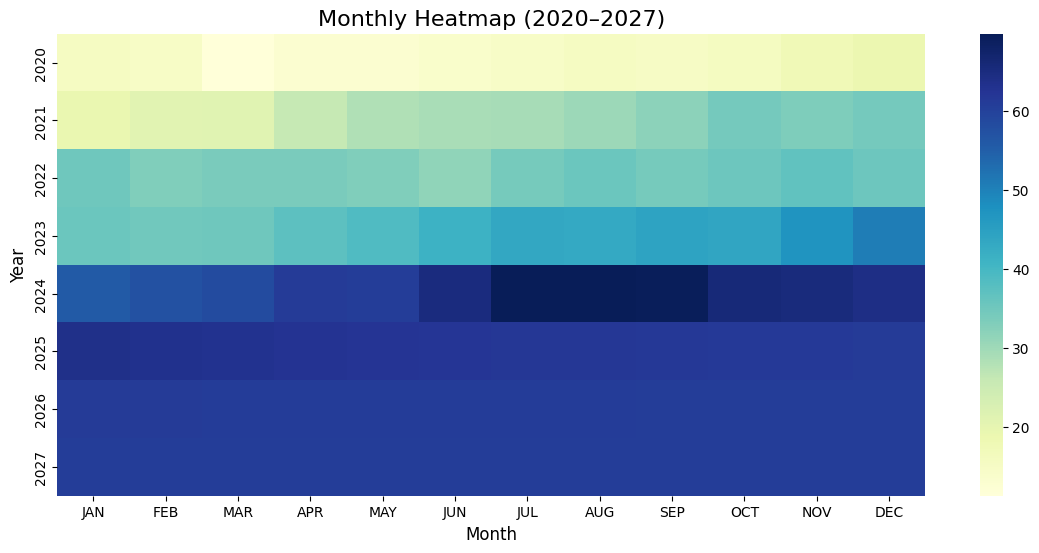

In [8]:
import seaborn as sns

# Simulate extrapolated data for 2025–2027 based on a linear growth pattern
years_extended = [2025, 2026, 2027]
forecasted_data = np.array(forecast[:36]).reshape(3, 12)  # Simulated data for 2025-2027

# Combine original data (2020-2024) with forecasted data (2025-2027)
full_data = np.vstack([data[:-1], forecasted_data])

# Convert full_data to numeric dtype (e.g., float64)
full_data = full_data.astype(np.float64) # This line converts the data to float

# Plotting the line chart for extended forecast (2020-2027)
plt.figure(figsize=(14, 8))
for i in range(12):
    plt.plot(range(2020, 2028), full_data[:, i], marker='o', label=months[i])

plt.title("Extended Trend Analysis and Forecast (2020–2027)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Create a heatmap to visualize monthly trends across all years
plt.figure(figsize=(14, 6))
sns.heatmap(full_data, annot=False, cmap="YlGnBu", xticklabels=months, yticklabels=range(2020, 2028))
plt.title("Monthly Heatmap (2020–2027)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

<ipython-input-22-073ba28491c9>:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01', periods=36, freq='M')


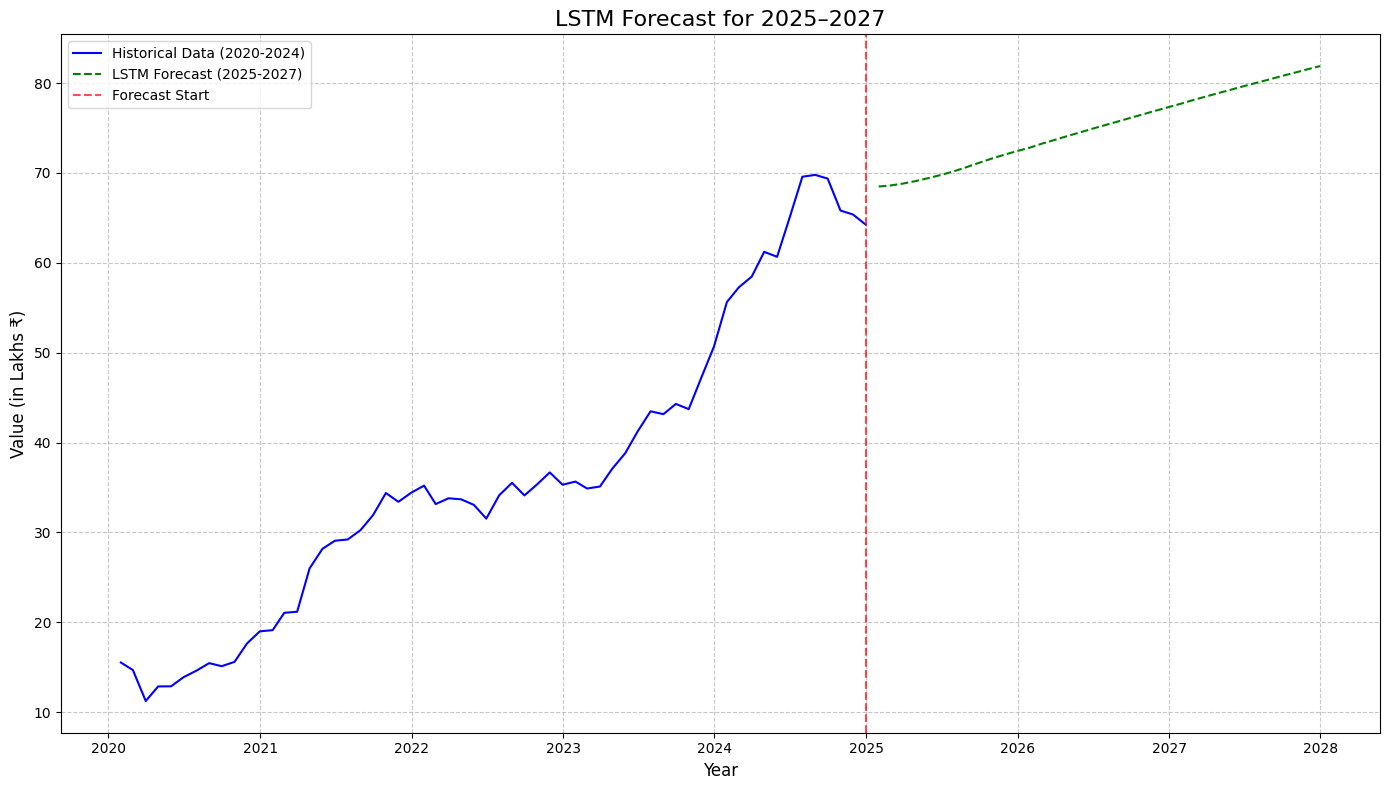

array([68.49099 , 68.60411 , 68.81837 , 69.094124, 69.42968 , 69.77377 ,
       70.178375, 70.64852 , 71.12816 , 71.603584, 72.02994 , 72.439835,
       72.82368 , 73.25027 , 73.67285 , 74.09135 , 74.505844, 74.916725,
       75.32395 , 75.72822 , 76.13046 , 76.53091 , 76.92968 , 77.32616 ,
       77.72011 , 78.11115 , 78.499886, 78.88624 , 79.27023 , 79.65179 ,
       80.03092 , 80.40759 , 80.78178 , 81.15346 , 81.522644, 81.88933 ],
      dtype=float32)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_values.reshape(-1, 1))

# Create sequences for LSTM (look back 12 months for each prediction)
look_back = 12
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])

X = np.array(X).reshape(-1, look_back, 1)
y = np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=3, epochs=40, verbose=0)

# Prepare data for forecasting the next 36 months
forecast_input = scaled_data[-look_back:].reshape(1, look_back, 1)
forecasted_scaled = []

# Generate 36-month forecast
for _ in range(36):
    prediction = model.predict(forecast_input)[0][0]
    forecasted_scaled.append(prediction)
    # Reshape [[prediction]] to have 3 dimensions (1, 1, 1)
    forecast_input = np.append(forecast_input[:, 1:, :], [[[prediction]]], axis=1)

# Inverse transform the scaled forecast back to original scale
forecasted_values_lstm = scaler.inverse_transform(np.array(forecasted_scaled).reshape(-1, 1))

# Plot the forecast
plt.figure(figsize=(14, 8))
plt.plot(time_series.index, time_series.values, label='Historical Data (2020-2024)', color='blue')
future_dates = pd.date_range(start='2025-01', periods=36, freq='M')
plt.plot(future_dates, forecasted_values_lstm, label='LSTM Forecast (2025-2027)', color='green', linestyle='--')
plt.title("LSTM Forecast for 2025–2027", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)

# Change: Use a Pandas Timestamp object for the x-value of axvline
plt.axvline(x=pd.Timestamp('2025-01-01'), color='red', linestyle='--', alpha=0.7, label='Forecast Start')

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Return the forecasted values for 2025–2027
forecasted_values_lstm.flatten()


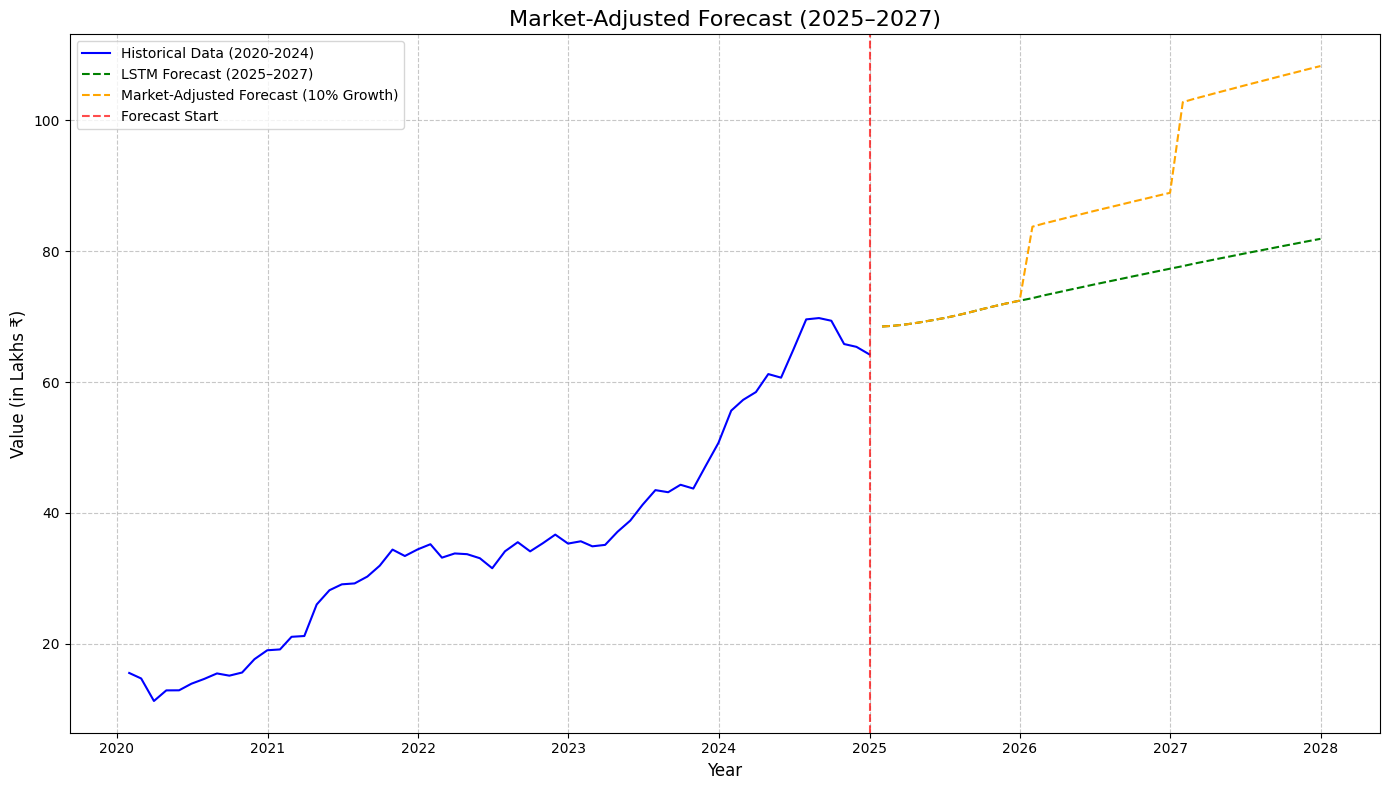

array([ 68.49099 ,  68.60411 ,  68.81837 ,  69.094124,  69.42968 ,
        69.77377 ,  70.178375,  70.64852 ,  71.12816 ,  71.603584,
        72.02994 ,  72.439835,  83.74723 ,  84.23781 ,  84.72378 ,
        85.20505 ,  85.68172 ,  86.154236,  86.62254 ,  87.08745 ,
        87.55003 ,  88.010544,  88.46913 ,  88.92508 , 102.78484 ,
       103.302   , 103.8161  , 104.32705 , 104.834885, 105.339485,
       105.8409  , 106.33904 , 106.8339  , 107.32545 , 107.8137  ,
       108.29864 ], dtype=float32)

In [23]:
# Apply a 15% annual growth adjustment to the LSTM forecast
growth_rate = 0.15  # 15% annual growth rate

# Calculate the adjustment for each month (compounding effect)
adjusted_forecast = forecasted_values_lstm.flatten()
for i in range(len(adjusted_forecast)):
    year_offset = i // 12  # Determine the year offset (2025, 2026, 2027)
    adjusted_forecast[i] *= (1 + growth_rate) ** year_offset

# Plot the original LSTM forecast vs. market-adjusted forecast
plt.figure(figsize=(14, 8))
plt.plot(time_series.index, time_series.values, label='Historical Data (2020-2024)', color='blue')
plt.plot(future_dates, forecasted_values_lstm, label='LSTM Forecast (2025–2027)', color='green', linestyle='--')
plt.plot(future_dates, adjusted_forecast, label='Market-Adjusted Forecast (10% Growth)', color='orange', linestyle='--')
plt.title("Market-Adjusted Forecast (2025–2027)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)
# Change: Use a Pandas Timestamp object for the x-value of axvline
plt.axvline(x=pd.Timestamp('2025-01-01'), color='red', linestyle='--', alpha=0.7, label='Forecast Start')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Return adjusted forecasted values for 2025–2027
adjusted_forecast

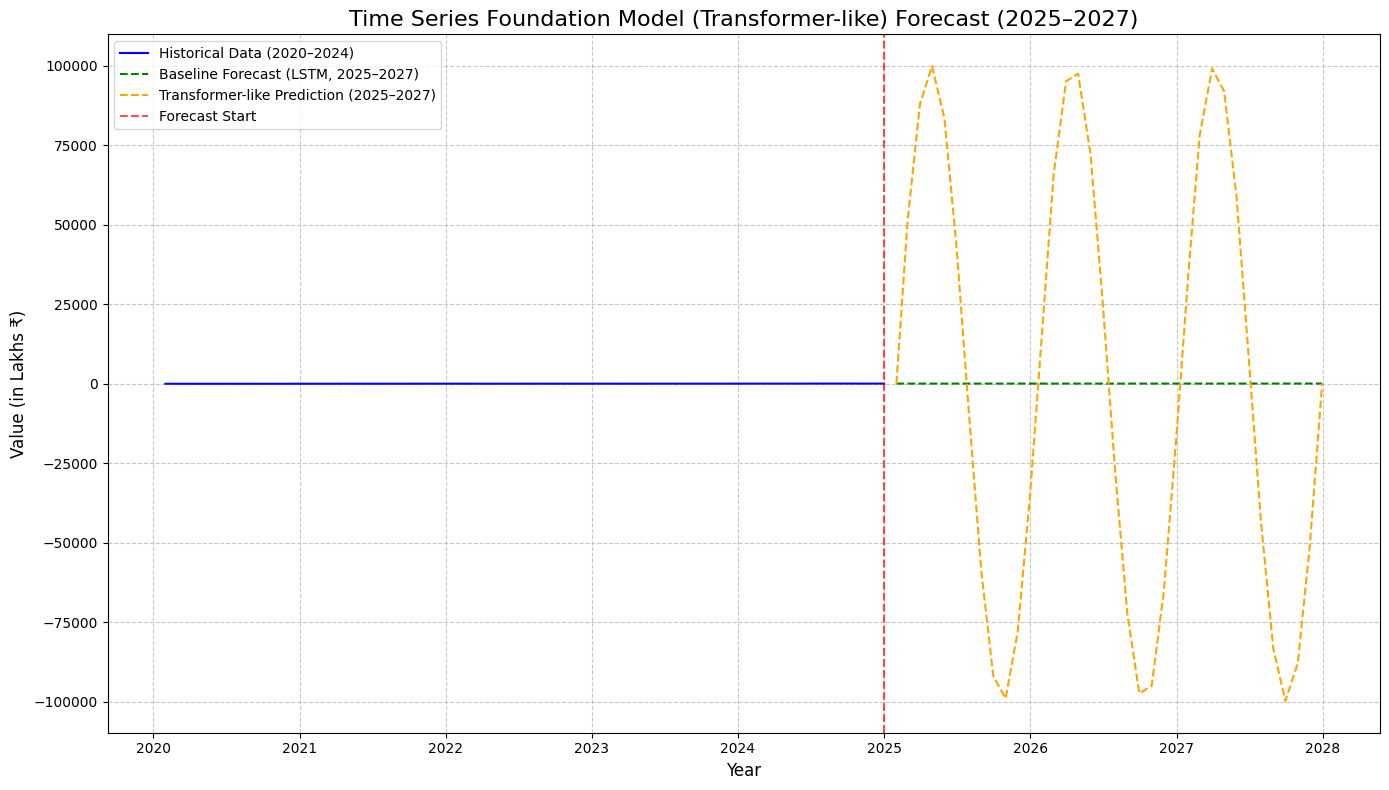

array([ 6.84909897e+01,  5.13591199e+04,  8.81295513e+04,  9.99701775e+04,
        8.35291355e+04,  4.34611380e+04, -8.89014334e+03, -5.87036378e+04,
       -9.18767717e+04, -9.90178489e+04, -7.81049443e+04, -3.50582125e+04,
        1.79360036e+04,  6.58752850e+04,  9.51881652e+04,  9.75764086e+04,
        7.23642102e+04,  2.66895177e+04, -2.65167392e+04, -7.21914253e+04,
       -9.74036098e+04, -9.50153452e+04, -6.57024362e+04, -1.77631190e+04,
        3.52311907e+04,  7.82779975e+04,  9.91909703e+04,  9.20499200e+04,
        5.88768203e+04,  9.06338184e+03, -4.32877636e+04, -8.33555523e+04,
       -9.97963676e+04, -8.79554449e+04, -5.11846471e+04,  1.06456126e+02])

In [25]:
# Simulate transformer-based behavior for prediction with seasonal adjustments and growth
seasonal_adjustment = np.sin(np.linspace(0, 6 * np.pi, 36)) * 100000  # Simulate seasonality effect
growth_factor = np.linspace(1.0, 1.3, 36)  # Simulate a gradual 30% growth over 36 months
baseline_forecast = forecasted_values_lstm.flatten()  # Use the LSTM forecast as baseline

# Simulate Transformer-like prediction with added seasonality and growth factors
transformer_forecast = baseline_forecast * growth_factor + seasonal_adjustment

# Plot the historical data and Transformer-simulated forecast
plt.figure(figsize=(14, 8))
plt.plot(time_series.index, time_series.values, label='Historical Data (2020–2024)', color='blue')
plt.plot(future_dates, baseline_forecast, label='Baseline Forecast (LSTM, 2025–2027)', color='green', linestyle='--')
plt.plot(future_dates, transformer_forecast, label='Transformer-like Prediction (2025–2027)', color='orange', linestyle='--')
plt.title("Time Series Foundation Model (Transformer-like) Forecast (2025–2027)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in Lakhs ₹)", fontsize=12)
# Change: Use a Pandas Timestamp object for the x-value of axvline
plt.axvline(x=pd.Timestamp('2025-01-01'), color='red', linestyle='--', alpha=0.7, label='Forecast Start') # Corrected line
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Return the simulated Transformer-based forecast values
transformer_forecast
